In [40]:
import numpy as np
import cv2

from scipy.misc import imread, imsave
import glob

#plotting
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.debugger import Tracer
import warnings
from jupyterthemes import jtplot

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

import glob
import io
import os
import random

In [3]:
%matplotlib inline
jtplot.style()
sns.set_context("poster")
# plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [48]:
# Settings for processing background image from median filter
num_bg_frames = 50
threshold = 200
ksize = (5, 5)
sigmaX = 1

# settings for drawing centroid circle
draw_radius = 3
draw_thickness = 2
draw_color = (0, 0, 255)

# settings for drawing position on output images
fontface = cv2.FONT_HERSHEY_PLAIN
fontscale = 1
fontcolor = (255, 255, 255)
fontoffset = (10, 150)


def median_filter(frames):
    # preprocess by blurring all the images to reduce noise
    imgs = (cv2.GaussianBlur(imread(fn).astype(np.float), ksize, sigmaX) for fn in frames)
    return np.median(list(imgs), axis=0)



In [49]:
 # get background image
bg = cv2.imread("background.png")
if bg is None:
    bgframes = glob.glob("Training Videos/frames/*.png")

    # select a random subset of images
    bg_imgs = random.sample(bgframes, num_bg_frames)

    # find background through a median filter
    bg = median_filter(bg_imgs)

    cv2.imwrite("background.png", bg)

# prepare output folder
try:
    os.mkdir("out")
except OSError:
    print("Warning: the output directory exists -- files may be overwritten.")


In [52]:
positions = io.StringIO()
frames = glob.glob("Training Videos/frames/*.png")
for frame in frames:
    # read file & blur
    img = cv2.GaussianBlur(cv2.imread(frame).astype(np.float), ksize, sigmaX)

    # remove background
    img = cv2.normalize(img - bg, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # convert to binary
    _, binimg = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    # calculate the centroid
    bugspot = np.mean(np.argwhere(img), axis=0)

    # write values to CSV
    _, fname = os.path.split(frame)        
    positions.write("{}, {}, {}\n".format(fname, *bugspot))

    # draw the centroid and save the output image
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.circle(
        img,
        tuple(bugspot.astype(int))[::-1],
        draw_radius, draw_color, draw_thickness
    )
    cv2.putText(
        img, 
        "R:{:.1f}, C:{:.1f}".format(*bugspot.tolist()), 
        (img.shape[1] - fontoffset[1], img.shape[0] - fontoffset[0]), 
        fontface, fontscale, fontcolor)
    cv2.imwrite("out/{}".format(fname), img.astype(np.uint8))

    # print current output
    print(frame, bugspot)

# write CSV output
with open('positions.csv', 'w') as fd:
    fd.write(positions.getvalue())

Training Videos/frames/out-00001.png [ 267.01517067  315.30214918]
Training Videos/frames/out-00002.png [ 256.93757881  317.28751576]
Training Videos/frames/out-00003.png [ 246.95962733  318.44037267]
Training Videos/frames/out-00004.png [ 236.65236318  319.11256219]
Training Videos/frames/out-00005.png [ 225.50747198  319.124533  ]
Training Videos/frames/out-00006.png [ 213.58874459  318.55782313]
Training Videos/frames/out-00007.png [ 202.33415842  317.04517327]
Training Videos/frames/out-00008.png [ 191.71410967  314.47566235]
Training Videos/frames/out-00009.png [ 182.19076923  310.91507692]
Training Videos/frames/out-00010.png [ 173.96581728  306.29086389]
Training Videos/frames/out-00011.png [ 166.34200508  300.96510152]
Training Videos/frames/out-00012.png [ 157.86817326  295.08474576]
Training Videos/frames/out-00013.png [ 149.19256966  288.46006192]
Training Videos/frames/out-00014.png [ 139.95909646  280.98046398]
Training Videos/frames/out-00015.png [ 130.24502488  274.72263

Training Videos/frames/out-00129.png [ 113.68032278  491.37368094]
Training Videos/frames/out-00130.png [ 101.1547763   484.58766626]
Training Videos/frames/out-00131.png [  86.15816005  477.67044739]
Training Videos/frames/out-00132.png [  65.47563559  471.55137712]
Training Videos/frames/out-00133.png [  69.56801777  469.25097168]
Training Videos/frames/out-00134.png [  81.30593325  467.72002472]
Training Videos/frames/out-00135.png [  84.28404669  465.36909394]
Training Videos/frames/out-00136.png [  83.71631644  463.38133498]
Training Videos/frames/out-00137.png [  78.26918317  459.96905941]
Training Videos/frames/out-00138.png [  65.32658643  457.46444201]
Training Videos/frames/out-00139.png [  63.66701681  456.50787815]
Training Videos/frames/out-00140.png [  68.30091013  457.31171786]
Training Videos/frames/out-00141.png [  65.51746032  459.3962963 ]
Training Videos/frames/out-00142.png [  61.811211    460.18032787]
Training Videos/frames/out-00143.png [  60.51427115  462.34862

Training Videos/frames/out-00257.png [  84.12665515  549.92630973]
Training Videos/frames/out-00258.png [  83.41200951  543.44887039]
Training Videos/frames/out-00259.png [  79.20284698  536.36002372]
Training Videos/frames/out-00260.png [  68.31762749  526.33259424]
Training Videos/frames/out-00261.png [  59.48167817  516.24269782]
Training Videos/frames/out-00262.png [  57.62209578  507.32100522]
Training Videos/frames/out-00263.png [  56.12785863  497.90176715]
Training Videos/frames/out-00264.png [  54.49513569  488.24577573]
Training Videos/frames/out-00265.png [  54.30659172  479.73377619]
Training Videos/frames/out-00266.png [  55.11530172  468.96875   ]
Training Videos/frames/out-00267.png [  55.64040729  454.90675241]
Training Videos/frames/out-00268.png [  55.75324675  443.53246753]
Training Videos/frames/out-00269.png [  60.62699822  429.46832445]
Training Videos/frames/out-00270.png [  63.65319662  414.80217129]
Training Videos/frames/out-00271.png [  67.05811863  402.02696

Training Videos/frames/out-00382.png [ 117.57468643  643.97263398]
Training Videos/frames/out-00383.png [ 124.07016543  656.92241871]
Training Videos/frames/out-00384.png [ 130.01620112  668.85195531]
Training Videos/frames/out-00385.png [ 135.36292835  679.47455867]
Training Videos/frames/out-00386.png [ 138.50735695  675.0719346 ]
Training Videos/frames/out-00387.png [ 143.43649085  675.49623251]
Training Videos/frames/out-00388.png [ 149.99325726  680.02748963]
Training Videos/frames/out-00389.png [ 156.32842415  684.119784  ]
Training Videos/frames/out-00390.png [ 160.91765369  676.83305133]
Training Videos/frames/out-00391.png [ 169.03132251  674.6774942 ]
Training Videos/frames/out-00392.png [ 178.60836723  672.77048228]
Training Videos/frames/out-00393.png [ 188.76121142  671.39370996]
Training Videos/frames/out-00394.png [ 198.66935484  670.56278802]
Training Videos/frames/out-00395.png [ 208.49066511  670.76079347]
Training Videos/frames/out-00396.png [ 218.96625945  671.69400

Training Videos/frames/out-00504.png [ 217.44849537  192.15914352]
Training Videos/frames/out-00505.png [ 228.52695652  200.34724638]
Training Videos/frames/out-00506.png [ 239.79149914  208.94945434]
Training Videos/frames/out-00507.png [ 251.02508751  217.97316219]
Training Videos/frames/out-00508.png [ 261.58452722  226.71232092]
Training Videos/frames/out-00509.png [ 271.91908832  235.35498575]
Training Videos/frames/out-00510.png [ 280.50117096  244.32845433]
Training Videos/frames/out-00511.png [ 289.56839623  253.6509434 ]
Training Videos/frames/out-00512.png [ 297.64774044  263.27404403]
Training Videos/frames/out-00513.png [ 305.3118527   273.60759494]
Training Videos/frames/out-00514.png [ 313.12175418  284.27062897]
Training Videos/frames/out-00515.png [ 320.39965497  295.48763657]
Training Videos/frames/out-00516.png [ 327.68617326  307.75329891]
Training Videos/frames/out-00517.png [ 333.91077636  321.08400927]
Training Videos/frames/out-00518.png [ 338.72732558  334.12267

Training Videos/frames/out-00630.png [ 377.99824047  309.56715543]
Training Videos/frames/out-00631.png [ 376.96996466  321.41755006]
Training Videos/frames/out-00632.png [ 374.71385723  333.12057588]
Training Videos/frames/out-00633.png [ 370.7962963   345.58271605]
Training Videos/frames/out-00634.png [ 365.43063402  357.01255493]
Training Videos/frames/out-00635.png [ 359.14634146  367.34208881]
Training Videos/frames/out-00636.png [ 351.20506634  378.61519903]
Training Videos/frames/out-00637.png [ 341.79031269  389.44451257]
Training Videos/frames/out-00638.png [ 333.95835962  398.42208202]
Training Videos/frames/out-00639.png [ 333.67456359  402.07294264]
Training Videos/frames/out-00640.png [ 334.39027215  403.86218877]
Training Videos/frames/out-00641.png [ 337.51017964  404.28682635]
Training Videos/frames/out-00642.png [ 343.68546512  405.96337209]
Training Videos/frames/out-00643.png [ 350.60190137  408.69815805]
Training Videos/frames/out-00644.png [ 354.28971394  414.37188

Training Videos/frames/out-00755.png [  86.30985915  391.94600939]
Training Videos/frames/out-00756.png [  92.49327878  381.95149036]
Training Videos/frames/out-00757.png [  98.98148148  371.87574671]
Training Videos/frames/out-00758.png [ 104.77256944  360.29108796]
Training Videos/frames/out-00759.png [ 110.98938679  349.28537736]
Training Videos/frames/out-00760.png [ 116.08486647  337.31869436]
Training Videos/frames/out-00761.png [ 120.08759954  324.48976109]
Training Videos/frames/out-00762.png [ 123.55808383  313.11796407]
Training Videos/frames/out-00763.png [ 126.76349303  300.38993329]
Training Videos/frames/out-00764.png [ 129.44691062  287.30113977]
Training Videos/frames/out-00765.png [ 131.54392523  275.51090343]
Training Videos/frames/out-00766.png [ 132.03848467  263.84185207]
Training Videos/frames/out-00767.png [ 132.67737948  251.01606922]
Training Videos/frames/out-00768.png [ 133.1923775  237.4246824]
Training Videos/frames/out-00769.png [ 133.83004926  225.3140394

Training Videos/frames/out-00880.png [ 406.90676329  643.35362319]
Training Videos/frames/out-00881.png [ 411.14653558  651.35252809]
Training Videos/frames/out-00882.png [ 416.02837189  660.6931471 ]
Training Videos/frames/out-00883.png [ 417.44786041  667.13045285]
Training Videos/frames/out-00884.png [ 417.62594509  671.71826502]
Training Videos/frames/out-00885.png [ 416.65116279  673.56365786]
Training Videos/frames/out-00886.png [ 414.25432006  679.79413974]
Training Videos/frames/out-00887.png [ 416.35692189  678.81902552]
Training Videos/frames/out-00888.png [ 413.1456422  681.1559633]
Training Videos/frames/out-00889.png [ 417.97367445  678.15832406]
Training Videos/frames/out-00890.png [ 413.0923018   680.13558024]
Training Videos/frames/out-00891.png [ 415.80394345  680.90290179]
Training Videos/frames/out-00892.png [ 417.68107519  680.98183799]
Training Videos/frames/out-00893.png [ 416.58373923  679.91982016]
Training Videos/frames/out-00894.png [ 409.97764901  681.2272351

Training Videos/frames/out-01009.png [ 384.535  348.06 ]
Training Videos/frames/out-01010.png [ 382.38409091  332.63011364]
Training Videos/frames/out-01011.png [ 379.66269165  318.69846678]
Training Videos/frames/out-01012.png [ 377.65605458  304.73791927]
Training Videos/frames/out-01013.png [ 376.28604119  290.83524027]
Training Videos/frames/out-01014.png [ 374.92687075  279.28911565]
Training Videos/frames/out-01015.png [ 373.03625209  267.46737312]
Training Videos/frames/out-01016.png [ 371.68415116  254.82459109]
Training Videos/frames/out-01017.png [ 370.16255605  242.53699552]
Training Videos/frames/out-01018.png [ 369.476402    231.17434758]
Training Videos/frames/out-01019.png [ 368.99496926  219.44158748]
Training Videos/frames/out-01020.png [ 370.53318584  208.53318584]
Training Videos/frames/out-01021.png [ 371.78176796  197.4281768 ]
Training Videos/frames/out-01022.png [ 372.59912109  180.59130859]
Training Videos/frames/out-01023.png [ 374.89901698  173.10053619]
Train

Training Videos/frames/out-01134.png [  75.88875946  452.08270239]
Training Videos/frames/out-01135.png [  80.64014252  440.99584323]
Training Videos/frames/out-01136.png [  86.57334109  429.67403958]
Training Videos/frames/out-01137.png [  93.69153345  419.22616933]
Training Videos/frames/out-01138.png [ 100.92394534  408.62626263]
Training Videos/frames/out-01139.png [ 109.9290439   398.13890559]
Training Videos/frames/out-01140.png [ 119.50606061  389.06060606]
Training Videos/frames/out-01141.png [ 129.09893993  380.82332155]
Training Videos/frames/out-01142.png [ 138.91771772  373.78498498]
Training Videos/frames/out-01143.png [ 150.43571429  365.80535714]
Training Videos/frames/out-01144.png [ 161.85944014  358.57712924]
Training Videos/frames/out-01145.png [ 172.86948529  351.01470588]
Training Videos/frames/out-01146.png [ 182.95127893  345.64738124]
Training Videos/frames/out-01147.png [ 193.19011183  341.01118305]
Training Videos/frames/out-01148.png [ 202.95395948  338.38980

Training Videos/frames/out-01260.png [  79.21265823  674.90177215]
Training Videos/frames/out-01261.png [  76.33688483  675.3500761 ]
Training Videos/frames/out-01262.png [  73.57473578  677.25767489]
Training Videos/frames/out-01263.png [  70.46901763  676.02518892]
Training Videos/frames/out-01264.png [  66.26795443  675.38038633]
Training Videos/frames/out-01265.png [  56.78935796  681.59454705]
Training Videos/frames/out-01266.png [  52.24076488  684.64232942]
Training Videos/frames/out-01267.png [  55.81294964  680.11016187]
Training Videos/frames/out-01268.png [  54.09684393  680.64548206]
Training Videos/frames/out-01269.png [  50.47771236  681.75357443]
Training Videos/frames/out-01270.png [  52.76683087  681.95730706]
Training Videos/frames/out-01271.png [  56.51166667  681.28583333]
Training Videos/frames/out-01272.png [  61.33305648  683.28197674]
Training Videos/frames/out-01273.png [  66.02303263  681.28262956]
Training Videos/frames/out-01274.png [  63.09233024  681.76844

Training Videos/frames/out-01388.png [ 311.62913907  627.08112583]
Training Videos/frames/out-01389.png [ 322.10726257  621.49329609]
Training Videos/frames/out-01390.png [ 332.72762646  615.93996665]
Training Videos/frames/out-01391.png [ 344.26813541  610.80601827]
Training Videos/frames/out-01392.png [ 355.75583982  605.3192436 ]
Training Videos/frames/out-01393.png [ 368.71764706  600.50252101]
Training Videos/frames/out-01394.png [ 381.70330903  596.39259675]
Training Videos/frames/out-01395.png [ 397.53194888  592.97177849]
Training Videos/frames/out-01396.png [ 404.209375    591.44895833]
Training Videos/frames/out-01397.png [ 398.89565678  590.54131356]
Training Videos/frames/out-01398.png [ 397.21436344  587.65886834]
Training Videos/frames/out-01399.png [ 398.96775927  582.25416443]
Training Videos/frames/out-01400.png [ 404.71356275  575.50101215]
Training Videos/frames/out-01401.png [ 414.13238561  564.98756108]
Training Videos/frames/out-01402.png [ 421.35960182  554.54666

Training Videos/frames/out-01515.png [  81.19969589  682.34769387]
Training Videos/frames/out-01516.png [  74.05544841  684.91562199]
Training Videos/frames/out-01517.png [  61.60809154  688.39190846]
Training Videos/frames/out-01518.png [  58.74853344  689.86429409]
Training Videos/frames/out-01519.png [  63.43279687  686.5476294 ]
Training Videos/frames/out-01520.png [  69.01196172  682.784689  ]
Training Videos/frames/out-01521.png [  62.86860941  677.51226994]
Training Videos/frames/out-01522.png [  64.96246787  675.30128535]
Training Videos/frames/out-01523.png [  71.91134952  674.86674195]
Training Videos/frames/out-01524.png [  70.92008412  677.92060988]
Training Videos/frames/out-01525.png [  64.29073909  683.8601959 ]
Training Videos/frames/out-01526.png [  58.57547993  688.43673647]
Training Videos/frames/out-01527.png [  57.91883373  689.8498818 ]
Training Videos/frames/out-01528.png [  56.03048066  689.70339977]
Training Videos/frames/out-01529.png [  58.05971405  686.49074

Training Videos/frames/out-01639.png [ 366.35023256  173.49162791]
Training Videos/frames/out-01640.png [ 373.18964706  171.13317647]
Training Videos/frames/out-01641.png [ 381.29660623  165.26499303]
Training Videos/frames/out-01642.png [ 390.04431247  160.60529922]
Training Videos/frames/out-01643.png [ 400.02540501  154.89322533]
Training Videos/frames/out-01644.png [ 402.7941516   152.06310119]
Training Videos/frames/out-01645.png [ 403.34552999  153.25122595]
Training Videos/frames/out-01646.png [ 402.07443245  151.81280238]
Training Videos/frames/out-01647.png [ 403.82087912  157.97435897]
Training Videos/frames/out-01648.png [ 406.26041667  170.12419872]
Training Videos/frames/out-01649.png [ 412.67527675  188.68680812]
Training Videos/frames/out-01650.png [ 415.5865609   200.14092394]
Training Videos/frames/out-01651.png [ 418.60044944  211.88449438]
Training Videos/frames/out-01652.png [ 420.08685869  222.62286229]
Training Videos/frames/out-01653.png [ 420.58438061  234.57226

Training Videos/frames/out-01767.png [ 329.96623981  184.08090803]
Training Videos/frames/out-01768.png [ 340.27065026  182.30931459]
Training Videos/frames/out-01769.png [ 351.11072863  179.91853127]
Training Videos/frames/out-01770.png [ 363.38181818  174.98025974]
Training Videos/frames/out-01771.png [ 375.4006986   169.75548902]
Training Videos/frames/out-01772.png [ 387.35055165  167.50300903]
Training Videos/frames/out-01773.png [ 400.64713486  166.27617406]
Training Videos/frames/out-01774.png [ 404.03955021  160.64443583]
Training Videos/frames/out-01775.png [ 396.54694229  161.66752799]
Training Videos/frames/out-01776.png [ 400.46669495  164.8455664 ]
Training Videos/frames/out-01777.png [ 403.33765032  169.7053654 ]
Training Videos/frames/out-01778.png [ 398.87412237  172.71815446]
Training Videos/frames/out-01779.png [ 398.77196546  174.91264601]
Training Videos/frames/out-01780.png [ 400.94908552  176.69896194]
Training Videos/frames/out-01781.png [ 405.63804878  180.06439

Training Videos/frames/out-01892.png [  65.18493909  184.06035437]
Training Videos/frames/out-01893.png [  56.85536044  174.08780037]
Training Videos/frames/out-01894.png [  65.06220096  170.83253589]
Training Videos/frames/out-01895.png [  60.30918092  170.94014401]
Training Videos/frames/out-01896.png [  60.65593376  167.71711132]
Training Videos/frames/out-01897.png [  58.24569916  170.76973974]
Training Videos/frames/out-01898.png [  57.53552398  168.31882771]
Training Videos/frames/out-01899.png [  56.35960182  166.28784737]
Training Videos/frames/out-01900.png [  56.26033755  166.21814346]
Training Videos/frames/out-01901.png [  58.04199475  166.9768154 ]
Training Videos/frames/out-01902.png [  57.56360424  166.58657244]
Training Videos/frames/out-01903.png [  56.31218849  168.69234255]
Training Videos/frames/out-01904.png [  56.25696316  167.03638814]
Training Videos/frames/out-01905.png [  55.50681818  166.31363636]
Training Videos/frames/out-01906.png [  55.82301255  169.82928

Training Videos/frames/out-02016.png [ 320.56753813  606.54248366]
Training Videos/frames/out-02017.png [ 313.52140078  614.77487493]
Training Videos/frames/out-02018.png [ 305.53221289  623.80168067]
Training Videos/frames/out-02019.png [ 296.79018613  632.48336153]
Training Videos/frames/out-02020.png [ 287.12114414  640.54066181]
Training Videos/frames/out-02021.png [ 277.18789263  648.54654483]
Training Videos/frames/out-02022.png [ 267.13246163  656.42694713]
Training Videos/frames/out-02023.png [ 256.38092519  664.17475728]
Training Videos/frames/out-02024.png [ 244.96869664  671.85941946]
Training Videos/frames/out-02025.png [ 231.18273092  683.80220884]
Training Videos/frames/out-02026.png [ 220.27494033  689.96038186]
Training Videos/frames/out-02027.png [ 211.9470405   684.04049844]
Training Videos/frames/out-02028.png [ 203.87322275  675.79028436]
Training Videos/frames/out-02029.png [ 195.76954976  669.46386256]
Training Videos/frames/out-02030.png [ 185.99313501  662.10640

Training Videos/frames/out-02140.png [ 169.32254123  322.92791692]
Training Videos/frames/out-02141.png [ 160.32589839  328.43866171]
Training Videos/frames/out-02142.png [ 150.3588635   333.97961705]
Training Videos/frames/out-02143.png [ 140.67815385  338.96246154]
Training Videos/frames/out-02144.png [ 130.52395391  344.33292905]
Training Videos/frames/out-02145.png [ 121.71533293  350.62370189]
Training Videos/frames/out-02146.png [ 112.00183262  356.87171655]
Training Videos/frames/out-02147.png [ 103.13914096  363.19661222]
Training Videos/frames/out-02148.png [  93.55717762  370.2256691 ]
Training Videos/frames/out-02149.png [  84.41385653  376.03740037]
Training Videos/frames/out-02150.png [  74.42044064  382.28335373]
Training Videos/frames/out-02151.png [  62.5011274  386.8162345]
Training Videos/frames/out-02152.png [  65.69256948  388.35564379]
Training Videos/frames/out-02153.png [  70.14975845  392.12258454]
Training Videos/frames/out-02154.png [  69.00170261  397.8921679

Training Videos/frames/out-02267.png [ 177.01823708  254.94285714]
Training Videos/frames/out-02268.png [ 168.18325243  264.51941748]
Training Videos/frames/out-02269.png [ 159.79065534  273.15898058]
Training Videos/frames/out-02270.png [ 151.51958384  282.04283966]
Training Videos/frames/out-02271.png [ 144.09613059  290.29322854]
Training Videos/frames/out-02272.png [ 137.53304509  299.63125386]
Training Videos/frames/out-02273.png [ 130.19175627  309.5692951 ]
Training Videos/frames/out-02274.png [ 123.18795181  320.67048193]
Training Videos/frames/out-02275.png [ 116.6779661   331.31598063]
Training Videos/frames/out-02276.png [ 109.8597561   341.89268293]
Training Videos/frames/out-02277.png [ 103.0486618   352.08029197]
Training Videos/frames/out-02278.png [  94.86731001  361.32629674]
Training Videos/frames/out-02279.png [  85.65531915  370.4887538 ]
Training Videos/frames/out-02280.png [  75.61884498  378.043769  ]
Training Videos/frames/out-02281.png [  61.97322922  384.29894

Training Videos/frames/out-02396.png [ 328.99246813  183.27114716]
Training Videos/frames/out-02397.png [ 315.68665491  182.47560259]
Training Videos/frames/out-02398.png [ 302.56187093  181.883955  ]
Training Videos/frames/out-02399.png [ 289.60630841  181.94275701]
Training Videos/frames/out-02400.png [ 276.83419097  182.27787307]
Training Videos/frames/out-02401.png [ 265.41277351  183.62389119]
Training Videos/frames/out-02402.png [ 255.82039397  184.87253766]
Training Videos/frames/out-02403.png [ 245.71420083  187.06892454]
Training Videos/frames/out-02404.png [ 235.14738696  189.39283617]
Training Videos/frames/out-02405.png [ 223.62411348  192.80260047]
Training Videos/frames/out-02406.png [ 211.91805226  196.09916865]
Training Videos/frames/out-02407.png [ 199.7327381   198.88988095]
Training Videos/frames/out-02408.png [ 187.56902761  201.12364946]
Training Videos/frames/out-02409.png [ 175.97382199  202.36009308]
Training Videos/frames/out-02410.png [ 164.4508982   203.40239

Training Videos/frames/out-02520.png [  68.65663322  585.14604236]
Training Videos/frames/out-02521.png [  65.78726968  574.17755444]
Training Videos/frames/out-02522.png [  63.49147727  563.09431818]
Training Videos/frames/out-02523.png [  58.07889126  551.00906183]
Training Videos/frames/out-02524.png [  52.0978785   538.50867888]
Training Videos/frames/out-02525.png [  49.19105882  527.92611765]
Training Videos/frames/out-02526.png [  56.287102    519.92282785]
Training Videos/frames/out-02527.png [  60.77667219  508.66943062]
Training Videos/frames/out-02528.png [  67.33651685  495.09775281]
Training Videos/frames/out-02529.png [  73.13848817  480.15522216]
Training Videos/frames/out-02530.png [  81.69142857  465.96057143]
Training Videos/frames/out-02531.png [  91.51203369  454.21179302]
Training Videos/frames/out-02532.png [ 101.64556176  445.85599007]
Training Videos/frames/out-02533.png [ 111.23380629  440.58544109]
Training Videos/frames/out-02534.png [ 121.12324588  437.11287

Training Videos/frames/out-02643.png [ 397.23558758  458.23281596]
Training Videos/frames/out-02644.png [ 393.37588652  468.72067649]
Training Videos/frames/out-02645.png [ 388.76171654  479.66233766]
Training Videos/frames/out-02646.png [ 383.3510341   491.22414757]
Training Videos/frames/out-02647.png [ 378.22145144  501.95357524]
Training Videos/frames/out-02648.png [ 372.98160173  513.004329  ]
Training Videos/frames/out-02649.png [ 367.47510823  524.47564935]
Training Videos/frames/out-02650.png [ 361.62162162  535.94486486]
Training Videos/frames/out-02651.png [ 355.21669342  547.27233815]
Training Videos/frames/out-02652.png [ 348.67491927  558.48708288]
Training Videos/frames/out-02653.png [ 342.0395664   567.81084011]
Training Videos/frames/out-02654.png [ 334.48241758  576.34395604]
Training Videos/frames/out-02655.png [ 325.30340909  584.05965909]
Training Videos/frames/out-02656.png [ 315.45635618  591.38781488]
Training Videos/frames/out-02657.png [ 305.93053221  596.92997

Training Videos/frames/out-02768.png [ 172.92752741  205.01522533]
Training Videos/frames/out-02769.png [ 162.22949853  204.17050147]
Training Videos/frames/out-02770.png [ 151.24369748  202.5180072 ]
Training Videos/frames/out-02771.png [ 140.41073583  199.59951749]
Training Videos/frames/out-02772.png [ 130.02258852  196.17094017]
Training Videos/frames/out-02773.png [ 120.06216053  192.16234158]
Training Videos/frames/out-02774.png [ 110.09478104  187.35272945]
Training Videos/frames/out-02775.png [ 100.1748959   181.83462225]
Training Videos/frames/out-02776.png [  86.91761071  171.37126674]
Training Videos/frames/out-02777.png [  75.35917188  163.3933558 ]
Training Videos/frames/out-02778.png [  63.0352459   160.82540984]
Training Videos/frames/out-02779.png [  62.0992268   161.21434708]
Training Videos/frames/out-02780.png [  62.03126303  162.01333889]
Training Videos/frames/out-02781.png [  61.31805039  165.04874019]
Training Videos/frames/out-02782.png [  61.18220176  165.95627

Training Videos/frames/out-02891.png [  56.75316804  486.97410468]
Training Videos/frames/out-02892.png [  53.54471545  500.0726626 ]
Training Videos/frames/out-02893.png [  50.97367114  513.34475907]
Training Videos/frames/out-02894.png [  47.85339578  525.92693208]
Training Videos/frames/out-02895.png [  46.40619137  534.59193246]
Training Videos/frames/out-02896.png [  45.70202952  543.09640221]
Training Videos/frames/out-02897.png [  44.42237762  550.96363636]
Training Videos/frames/out-02898.png [  43.0599455  558.626703 ]
Training Videos/frames/out-02899.png [  42.12361542  566.27868852]
Training Videos/frames/out-02900.png [  41.18644068  576.00782269]
Training Videos/frames/out-02901.png [  41.20535714  587.36278195]
Training Videos/frames/out-02902.png [  41.00132685  597.74966829]
Training Videos/frames/out-02903.png [  42.46464208  608.17787419]
Training Videos/frames/out-02904.png [  44.84632129  616.98998694]
Training Videos/frames/out-02905.png [  47.08440124  626.3358373

Training Videos/frames/out-03015.png [ 389.52104422  575.8247203 ]
Training Videos/frames/out-03016.png [ 383.76347462  586.64730508]
Training Videos/frames/out-03017.png [ 376.80325203  597.74200542]
Training Videos/frames/out-03018.png [ 369.56728778  608.69668737]
Training Videos/frames/out-03019.png [ 362.2613819   619.56079272]
Training Videos/frames/out-03020.png [ 355.31531049  630.18415418]
Training Videos/frames/out-03021.png [ 348.18991416  640.93508584]
Training Videos/frames/out-03022.png [ 342.59915164  650.91887593]
Training Videos/frames/out-03023.png [ 336.59751486  660.9265262 ]
Training Videos/frames/out-03024.png [ 330.67765568  671.39665097]
Training Videos/frames/out-03025.png [ 324.49491032  679.07804169]
Training Videos/frames/out-03026.png [ 317.21968912  671.53471503]
Training Videos/frames/out-03027.png [ 308.1034279  668.8179669]
Training Videos/frames/out-03028.png [ 298.2431629   665.66884661]
Training Videos/frames/out-03029.png [ 288.52829065  660.6259678

Training Videos/frames/out-03140.png [ 230.45972495  689.65815324]
Training Videos/frames/out-03141.png [ 217.70939759  691.55277108]
Training Videos/frames/out-03142.png [ 204.38773628  693.1143384 ]
Training Videos/frames/out-03143.png [ 191.55909091  694.47318182]
Training Videos/frames/out-03144.png [ 178.72970601  696.08951294]
Training Videos/frames/out-03145.png [ 165.71676301  697.26278346]
Training Videos/frames/out-03146.png [ 153.06152433  698.34113866]
Training Videos/frames/out-03147.png [ 140.68930762  698.88475022]
Training Videos/frames/out-03148.png [ 127.7310962   699.18612975]
Training Videos/frames/out-03149.png [ 114.9881495   699.18368277]
Training Videos/frames/out-03150.png [ 102.00090909  699.06909091]
Training Videos/frames/out-03151.png [  90.49436175  698.69418133]
Training Videos/frames/out-03152.png [  79.23996432  698.12265834]
Training Videos/frames/out-03153.png [  65.9102091   696.12423124]
Training Videos/frames/out-03154.png [  71.23222549  690.79049

Training Videos/frames/out-03264.png [ 229.13505578  581.62008221]
Training Videos/frames/out-03265.png [ 217.96373365  590.94827586]
Training Videos/frames/out-03266.png [ 206.83362218  598.71808203]
Training Videos/frames/out-03267.png [ 196.46079614  606.71954162]
Training Videos/frames/out-03268.png [ 184.80650995  614.94755877]
Training Videos/frames/out-03269.png [ 173.63701493  622.59343284]
Training Videos/frames/out-03270.png [ 162.53530477  629.46469523]
Training Videos/frames/out-03271.png [ 150.19287834  636.22492582]
Training Videos/frames/out-03272.png [ 138.57759137  641.63031756]
Training Videos/frames/out-03273.png [ 126.86063133  646.25134008]
Training Videos/frames/out-03274.png [ 116.01798561  650.0323741 ]
Training Videos/frames/out-03275.png [ 105.81812615  652.79179424]
Training Videos/frames/out-03276.png [  96.01932367  654.80736715]
Training Videos/frames/out-03277.png [  86.21575758  656.7169697 ]
Training Videos/frames/out-03278.png [  74.92532855  658.79271

Training Videos/frames/out-03390.png [ 396.98513011  675.74349442]
Training Videos/frames/out-03391.png [ 392.22464899  675.01768071]
Training Videos/frames/out-03392.png [ 387.12660256  672.25534188]
Training Videos/frames/out-03393.png [ 383.95799236  671.39934534]
Training Videos/frames/out-03394.png [ 377.99593289  674.67666497]
Training Videos/frames/out-03395.png [ 370.44223301  679.65873786]
Training Videos/frames/out-03396.png [ 364.04242723  680.64430192]
Training Videos/frames/out-03397.png [ 355.24265451  680.28824721]
Training Videos/frames/out-03398.png [ 344.53639649  682.8316985 ]
Training Videos/frames/out-03399.png [ 332.2526096   686.53235908]
Training Videos/frames/out-03400.png [ 319.54869006  690.9550173 ]
Training Videos/frames/out-03401.png [ 307.62168344  694.31564501]
Training Videos/frames/out-03402.png [ 295.70713961  695.23283311]
Training Videos/frames/out-03403.png [ 284.54886878  695.7       ]
Training Videos/frames/out-03404.png [ 271.98446937  695.75496

Training Videos/frames/out-03517.png [ 148.26404494  467.41629213]
Training Videos/frames/out-03518.png [ 147.80076628  456.07772304]
Training Videos/frames/out-03519.png [ 145.12806236  445.44209354]
Training Videos/frames/out-03520.png [ 140.76713948  434.19385343]
Training Videos/frames/out-03521.png [ 137.14796547  423.99013564]
Training Videos/frames/out-03522.png [ 132.17558213  413.09565765]
Training Videos/frames/out-03523.png [ 126.96839444  402.20290771]
Training Videos/frames/out-03524.png [ 122.57397959  391.58482143]
Training Videos/frames/out-03525.png [ 118.87230105  381.47254781]
Training Videos/frames/out-03526.png [ 115.49423893  371.12977562]
Training Videos/frames/out-03527.png [ 112.7027198   360.98165718]
Training Videos/frames/out-03528.png [ 109.69365976  350.73634652]
Training Videos/frames/out-03529.png [ 106.02040816  339.11764706]
Training Videos/frames/out-03530.png [ 103.38867925  328.40503145]
Training Videos/frames/out-03531.png [  99.35777126  316.73724

Training Videos/frames/out-03640.png [ 355.70011025  569.97133407]
Training Videos/frames/out-03641.png [ 364.33824332  564.22531369]
Training Videos/frames/out-03642.png [ 372.31356398  557.98627128]
Training Videos/frames/out-03643.png [ 381.46038544  551.13115632]
Training Videos/frames/out-03644.png [ 389.21585903  543.74779736]
Training Videos/frames/out-03645.png [ 396.84919786  535.81336898]
Training Videos/frames/out-03646.png [ 408.81149859  525.12016965]
Training Videos/frames/out-03647.png [ 414.89573251  516.40431148]
Training Videos/frames/out-03648.png [ 405.58224674  513.69608826]
Training Videos/frames/out-03649.png [ 401.7292876   508.03060686]
Training Videos/frames/out-03650.png [ 398.91405405  501.91189189]
Training Videos/frames/out-03651.png [ 396.7357999   492.05419489]
Training Videos/frames/out-03652.png [ 395.20976395  481.09334764]
Training Videos/frames/out-03653.png [ 392.65789474  470.82116004]
Training Videos/frames/out-03654.png [ 390.75929007  460.60343

Training Videos/frames/out-03769.png [ 383.84281346  273.67278287]
Training Videos/frames/out-03770.png [ 376.90262172  283.88764045]
Training Videos/frames/out-03771.png [ 369.21926105  294.0090854 ]
Training Videos/frames/out-03772.png [ 360.77756892  304.28571429]
Training Videos/frames/out-03773.png [ 352.69259724  313.2446675 ]
Training Videos/frames/out-03774.png [ 344.14940364  321.86126805]
Training Videos/frames/out-03775.png [ 335.36891386  330.73345818]
Training Videos/frames/out-03776.png [ 325.5727729   338.99121706]
Training Videos/frames/out-03777.png [ 314.74751861  348.38523573]
Training Videos/frames/out-03778.png [ 307.25081011  355.32080363]
Training Videos/frames/out-03779.png [ 303.94983713  357.95960912]
Training Videos/frames/out-03780.png [ 302.23907285  357.31788079]
Training Videos/frames/out-03781.png [ 303.62767912  352.62216779]
Training Videos/frames/out-03782.png [ 304.56466302  351.81663631]
Training Videos/frames/out-03783.png [ 307.36142534  352.47228

Training Videos/frames/out-03897.png [ 397.55778689  164.15327869]
Training Videos/frames/out-03898.png [ 399.21400394  177.07988166]
Training Videos/frames/out-03899.png [ 402.01442786  184.860199  ]
Training Videos/frames/out-03900.png [ 407.31894484  194.22973621]
Training Videos/frames/out-03901.png [ 412.71580989  202.86129971]
Training Videos/frames/out-03902.png [ 404.36228814  209.53072034]
Training Videos/frames/out-03903.png [ 401.09565695  220.27707532]
Training Videos/frames/out-03904.png [ 396.75854214  234.16457859]
Training Videos/frames/out-03905.png [ 391.05310803  248.3983102 ]
Training Videos/frames/out-03906.png [ 382.77082067  260.30395137]
Training Videos/frames/out-03907.png [ 373.78439803  269.60995086]
Training Videos/frames/out-03908.png [ 363.96067416  277.85330836]
Training Videos/frames/out-03909.png [ 354.55006258  283.99812265]
Training Videos/frames/out-03910.png [ 345.76070991  289.12913097]
Training Videos/frames/out-03911.png [ 336.56685151  293.83733

Training Videos/frames/out-04021.png [ 387.19851232  174.80241748]
Training Videos/frames/out-04022.png [ 381.21484172  183.75921121]
Training Videos/frames/out-04023.png [ 375.42318207  187.76708584]
Training Videos/frames/out-04024.png [ 368.81353223  187.97815663]
Training Videos/frames/out-04025.png [ 361.29831461  187.61292135]
Training Videos/frames/out-04026.png [ 352.09948835  186.37862422]
Training Videos/frames/out-04027.png [ 342.35277301  185.4271012 ]
Training Videos/frames/out-04028.png [ 332.73732194  184.14529915]
Training Videos/frames/out-04029.png [ 324.15529412  183.64235294]
Training Videos/frames/out-04030.png [ 314.69619534  182.90573538]
Training Videos/frames/out-04031.png [ 304.16538234  183.54949615]
Training Videos/frames/out-04032.png [ 292.58826979  183.12961877]
Training Videos/frames/out-04033.png [ 282.0361861   183.33601379]
Training Videos/frames/out-04034.png [ 271.91906158  185.05043988]
Training Videos/frames/out-04035.png [ 261.34807916  186.68102

Training Videos/frames/out-04149.png [ 396.22494781  558.57881002]
Training Videos/frames/out-04150.png [ 393.18886576  547.51456816]
Training Videos/frames/out-04151.png [ 391.25549738  536.70366492]
Training Videos/frames/out-04152.png [ 389.89830508  524.33580508]
Training Videos/frames/out-04153.png [ 389.36547682  511.33351092]
Training Videos/frames/out-04154.png [ 389.97442873  499.46789989]
Training Videos/frames/out-04155.png [ 391.6783974   487.35733622]
Training Videos/frames/out-04156.png [ 394.24250535  476.07976445]
Training Videos/frames/out-04157.png [ 396.83704508  466.08093427]
Training Videos/frames/out-04158.png [ 399.47440837  454.69840396]
Training Videos/frames/out-04159.png [ 402.49545697  442.25708177]
Training Videos/frames/out-04160.png [ 405.39016393  429.06612022]
Training Videos/frames/out-04161.png [ 409.68502674  415.46203209]
Training Videos/frames/out-04162.png [ 414.94997524  401.34175334]
Training Videos/frames/out-04163.png [ 419.15215356  389.60627

Training Videos/frames/out-04272.png [ 127.35207967  569.4036321 ]
Training Videos/frames/out-04273.png [ 121.65940714  578.42528736]
Training Videos/frames/out-04274.png [ 115.22075585  587.30653869]
Training Videos/frames/out-04275.png [ 108.01892371  595.29686576]
Training Videos/frames/out-04276.png [ 100.61930456  603.63788969]
Training Videos/frames/out-04277.png [  92.71126761  611.90669014]
Training Videos/frames/out-04278.png [  84.87828162  618.32398568]
Training Videos/frames/out-04279.png [  75.73965937  624.45194647]
Training Videos/frames/out-04280.png [  62.5542826   631.46044735]
Training Videos/frames/out-04281.png [  62.2515528   635.67028986]
Training Videos/frames/out-04282.png [  70.60358796  638.38715278]
Training Videos/frames/out-04283.png [  74.1951508   643.52395033]
Training Videos/frames/out-04284.png [  75.27936146  652.43329532]
Training Videos/frames/out-04285.png [  75.38084507  661.26929577]
Training Videos/frames/out-04286.png [  75.61447639  676.38603

Training Videos/frames/out-04397.png [ 366.04066986  687.73492823]
Training Videos/frames/out-04398.png [ 357.77033493  690.15837321]
Training Videos/frames/out-04399.png [ 348.27793167  692.91135734]
Training Videos/frames/out-04400.png [ 338.69588793  694.58879349]
Training Videos/frames/out-04401.png [ 328.47341557  696.33602722]
Training Videos/frames/out-04402.png [ 318.50980392  697.05481283]
Training Videos/frames/out-04403.png [ 307.74324324  697.81711712]
Training Videos/frames/out-04404.png [ 299.65054945  694.33186813]
Training Videos/frames/out-04405.png [ 292.04385965  689.39766082]
Training Videos/frames/out-04406.png [ 281.70244919  682.2193851 ]
Training Videos/frames/out-04407.png [ 270.33898305  674.7748184 ]
Training Videos/frames/out-04408.png [ 259.51657625  669.17842074]
Training Videos/frames/out-04409.png [ 247.53160071  662.749557  ]
Training Videos/frames/out-04410.png [ 236.70428485  656.30537115]
Training Videos/frames/out-04411.png [ 226.40864799  650.21924

Training Videos/frames/out-04522.png [ 349.89160045  387.03178207]
Training Videos/frames/out-04523.png [ 358.34156379  395.80952381]
Training Videos/frames/out-04524.png [ 367.77660167  405.57158774]
Training Videos/frames/out-04525.png [ 377.0811124  415.2612978]
Training Videos/frames/out-04526.png [ 387.09822958  423.67447173]
Training Videos/frames/out-04527.png [ 397.29261364  431.05      ]
Training Videos/frames/out-04528.png [ 408.43309667  438.55051884]
Training Videos/frames/out-04529.png [ 400.84017279  439.88228942]
Training Videos/frames/out-04530.png [ 394.77082169  444.85019564]
Training Videos/frames/out-04531.png [ 391.81587473  451.89902808]
Training Videos/frames/out-04532.png [ 389.06972883  461.05478694]
Training Videos/frames/out-04533.png [ 386.25508521  472.0522265 ]
Training Videos/frames/out-04534.png [ 382.70343681  482.74002217]
Training Videos/frames/out-04535.png [ 378.62132753  493.92546246]
Training Videos/frames/out-04536.png [ 373.78970427  504.9529025

Training Videos/frames/out-04646.png [ 338.18017493  319.76209913]
Training Videos/frames/out-04647.png [ 335.87042417  308.07960488]
Training Videos/frames/out-04648.png [ 332.27818182  297.82484848]
Training Videos/frames/out-04649.png [ 329.38793613  287.44411591]
Training Videos/frames/out-04650.png [ 325.41047784  276.28094416]
Training Videos/frames/out-04651.png [ 322.16396292  264.57184241]
Training Videos/frames/out-04652.png [ 317.40285714  252.66514286]
Training Videos/frames/out-04653.png [ 312.16937355  240.95649652]
Training Videos/frames/out-04654.png [ 307.16280417  229.1778679 ]
Training Videos/frames/out-04655.png [ 304.00172117  218.83189902]
Training Videos/frames/out-04656.png [ 302.02507123  208.34301994]
Training Videos/frames/out-04657.png [ 300.60511364  197.67954545]
Training Videos/frames/out-04658.png [ 300.90770071  185.85581649]
Training Videos/frames/out-04659.png [ 302.05541562  175.68967254]
Training Videos/frames/out-04660.png [ 300.09241094  180.22199

Training Videos/frames/out-04772.png [ 108.50693189  338.10066305]
Training Videos/frames/out-04773.png [ 110.39281437  325.5239521 ]
Training Videos/frames/out-04774.png [ 113.17944147  312.5389186 ]
Training Videos/frames/out-04775.png [ 114.38655462  298.90636255]
Training Videos/frames/out-04776.png [ 116.23827392  284.9243277 ]
Training Videos/frames/out-04777.png [ 118.11912034  273.15088577]
Training Videos/frames/out-04778.png [ 119.45151328  260.57381099]
Training Videos/frames/out-04779.png [ 121.54588796  249.02324195]
Training Videos/frames/out-04780.png [ 123.46924429  237.79789104]
Training Videos/frames/out-04781.png [ 126.67839806  227.4538835 ]
Training Videos/frames/out-04782.png [ 130.52961877  217.51319648]
Training Videos/frames/out-04783.png [ 134.38615023  206.95950704]
Training Videos/frames/out-04784.png [ 138.89414548  196.24482555]
Training Videos/frames/out-04785.png [ 144.25706052  184.62305476]
Training Videos/frames/out-04786.png [ 150.80732984  173.70052

Training Videos/frames/out-04898.png [ 385.26375712  686.82542694]
Training Videos/frames/out-04899.png [ 396.07001321  687.110524  ]
Training Videos/frames/out-04900.png [ 401.44575937  677.69921105]
Training Videos/frames/out-04901.png [ 405.04577465  673.82897384]
Training Videos/frames/out-04902.png [ 403.17835002  670.19980925]
Training Videos/frames/out-04903.png [ 397.46896552  665.9729443 ]
Training Videos/frames/out-04904.png [ 399.33088595  657.72050906]
Training Videos/frames/out-04905.png [ 399.91518325  650.27801047]
Training Videos/frames/out-04906.png [ 401.86450283  641.93972179]
Training Videos/frames/out-04907.png [ 403.73653643  632.88489968]
Training Videos/frames/out-04908.png [ 405.32029995  624.28548473]
Training Videos/frames/out-04909.png [ 409.19726166  614.92089249]
Training Videos/frames/out-04910.png [ 413.22017916  605.11739745]
Training Videos/frames/out-04911.png [ 418.99749791  594.51334445]
Training Videos/frames/out-04912.png [ 422.8268595   585.81694

Training Videos/frames/out-05022.png [ 391.10907127  592.87958963]
Training Videos/frames/out-05023.png [ 386.76812367  602.50266525]
Training Videos/frames/out-05024.png [ 382.40972222  611.93162393]
Training Videos/frames/out-05025.png [ 377.64548319  621.55619748]
Training Videos/frames/out-05026.png [ 373.06063774  632.11657083]
Training Videos/frames/out-05027.png [ 367.67158672  641.94464945]
Training Videos/frames/out-05028.png [ 363.68462343  654.54550209]
Training Videos/frames/out-05029.png [ 359.49414634  670.28243902]
Training Videos/frames/out-05030.png [ 359.87618147  671.09120983]
Training Videos/frames/out-05031.png [ 363.04992118  660.74093537]
Training Videos/frames/out-05032.png [ 367.17411888  658.37822199]
Training Videos/frames/out-05033.png [ 373.4958859   658.93856281]
Training Videos/frames/out-05034.png [ 380.35385469  662.42318358]
Training Videos/frames/out-05035.png [ 388.86975242  670.24434876]
Training Videos/frames/out-05036.png [ 400.00359551  680.49528

Training Videos/frames/out-05147.png [ 392.98760074  312.26782393]
Training Videos/frames/out-05148.png [ 381.52937576  320.09791922]
Training Videos/frames/out-05149.png [ 371.34359606  326.68165025]
Training Videos/frames/out-05150.png [ 361.42660837  331.26733292]
Training Videos/frames/out-05151.png [ 351.42724458  334.81609907]
Training Videos/frames/out-05152.png [ 340.86881188  338.93935644]
Training Videos/frames/out-05153.png [ 328.5    343.395]
Training Videos/frames/out-05154.png [ 316.98401967  347.45359557]
Training Videos/frames/out-05155.png [ 305.32925337  352.22643819]
Training Videos/frames/out-05156.png [ 299.0017762   351.12847839]
Training Videos/frames/out-05157.png [ 292.59662398  345.58323632]
Training Videos/frames/out-05158.png [ 285.14310646  338.77079697]
Training Videos/frames/out-05159.png [ 278.00352319  329.70405167]
Training Videos/frames/out-05160.png [ 272.27650602  318.5186747 ]
Training Videos/frames/out-05161.png [ 269.02902056  308.18198307]
Train

Training Videos/frames/out-05273.png [  88.90958084  312.09221557]
Training Videos/frames/out-05274.png [  95.15903756  302.10504695]
Training Videos/frames/out-05275.png [ 102.30581395  292.84651163]
Training Videos/frames/out-05276.png [ 110.35392921  284.74325135]
Training Videos/frames/out-05277.png [ 117.3966447   276.20850809]
Training Videos/frames/out-05278.png [ 123.79181495  268.52728351]
Training Videos/frames/out-05279.png [ 128.54031783  259.47851677]
Training Videos/frames/out-05280.png [ 136.68219833  251.54181601]
Training Videos/frames/out-05281.png [ 144.38755981  240.92523923]
Training Videos/frames/out-05282.png [ 152.46622833  231.1858936 ]
Training Videos/frames/out-05283.png [ 159.83265306  222.94693878]
Training Videos/frames/out-05284.png [ 167.76100998  216.41984733]
Training Videos/frames/out-05285.png [ 175.25246091  209.04748118]
Training Videos/frames/out-05286.png [ 183.71309192  202.96824513]
Training Videos/frames/out-05287.png [ 192.49710983  198.03468

Training Videos/frames/out-05399.png [ 142.59005848  179.96315789]
Training Videos/frames/out-05400.png [ 153.0875072   179.45998849]
Training Videos/frames/out-05401.png [ 164.56253636  180.61721931]
Training Videos/frames/out-05402.png [ 175.36451247  181.27777778]
Training Videos/frames/out-05403.png [ 185.82928241  183.26793981]
Training Videos/frames/out-05404.png [ 196.49854397  185.15200932]
Training Videos/frames/out-05405.png [ 206.22196927  185.3636881 ]
Training Videos/frames/out-05406.png [ 216.8221709   186.68764434]
Training Videos/frames/out-05407.png [ 227.38629822  187.78295912]
Training Videos/frames/out-05408.png [ 237.89482859  187.21673446]
Training Videos/frames/out-05409.png [ 247.68947368  186.6877193 ]
Training Videos/frames/out-05410.png [ 256.59468822  184.99942263]
Training Videos/frames/out-05411.png [ 266.53664303  183.94739953]
Training Videos/frames/out-05412.png [ 277.16246334  181.4744868 ]
Training Videos/frames/out-05413.png [ 287.24293785  177.56271

Training Videos/frames/out-05525.png [ 414.65716458  682.53401748]
Training Videos/frames/out-05526.png [ 418.35107967  680.28145942]
Training Videos/frames/out-05527.png [ 418.53818313  679.52081071]
Training Videos/frames/out-05528.png [ 413.98271226  681.2285824 ]
Training Videos/frames/out-05529.png [ 415.93934911  677.83173077]
Training Videos/frames/out-05530.png [ 413.21028204  680.45091039]
Training Videos/frames/out-05531.png [ 414.92277719  679.66985476]
Training Videos/frames/out-05532.png [ 412.56070228  680.9174449 ]
Training Videos/frames/out-05533.png [ 413.97032641  681.87537092]
Training Videos/frames/out-05534.png [ 414.00112994  683.22975518]
Training Videos/frames/out-05535.png [ 413.71251768  683.52333805]
Training Videos/frames/out-05536.png [ 408.16721311  684.12827869]
Training Videos/frames/out-05537.png [ 410.88893426  681.57615353]
Training Videos/frames/out-05538.png [ 413.64484516  680.65503724]
Training Videos/frames/out-05539.png [ 414.35602891  683.29022

Training Videos/frames/out-05649.png [  49.38609113  511.10983213]
Training Videos/frames/out-05650.png [  52.15156093  500.99144008]
Training Videos/frames/out-05651.png [  55.54531331  490.48834801]
Training Videos/frames/out-05652.png [  60.14921324  478.19750407]
Training Videos/frames/out-05653.png [  65.184       467.51828571]
Training Videos/frames/out-05654.png [  70.85487528  456.37585034]
Training Videos/frames/out-05655.png [  76.48720999  447.23497918]
Training Videos/frames/out-05656.png [  82.83756645  437.22740697]
Training Videos/frames/out-05657.png [  89.12311266  427.38269454]
Training Videos/frames/out-05658.png [  96.99001762  417.92248972]
Training Videos/frames/out-05659.png [ 103.90919674  407.01862631]
Training Videos/frames/out-05660.png [ 112.96863905  395.41893491]
Training Videos/frames/out-05661.png [ 117.69839381  384.17370613]
Training Videos/frames/out-05662.png [ 123.75470553  372.93989071]
Training Videos/frames/out-05663.png [ 128.51805054  362.31768

Training Videos/frames/out-05777.png [ 317.48569857  463.45544554]
Training Videos/frames/out-05778.png [ 315.3187751   471.54869478]
Training Videos/frames/out-05779.png [ 314.53822938  480.58903421]
Training Videos/frames/out-05780.png [ 312.73530889  490.98643898]
Training Videos/frames/out-05781.png [ 310.54291519  502.77044185]
Training Videos/frames/out-05782.png [ 308.66683673  516.23571429]
Training Videos/frames/out-05783.png [ 306.8417382   530.33100858]
Training Videos/frames/out-05784.png [ 306.00904737  545.16444918]
Training Videos/frames/out-05785.png [ 305.57322404  559.06502732]
Training Videos/frames/out-05786.png [ 306.66778711  571.8022409 ]
Training Videos/frames/out-05787.png [ 308.59117805  582.28617536]
Training Videos/frames/out-05788.png [ 312.1632  593.888 ]
Training Videos/frames/out-05789.png [ 315.63062569  606.0521405 ]
Training Videos/frames/out-05790.png [ 318.25013535  616.6345425 ]
Training Videos/frames/out-05791.png [ 321.45676998  629.38771071]
Tra

Training Videos/frames/out-05903.png [ 393.0083632   216.13679809]
Training Videos/frames/out-05904.png [ 388.05263158  226.03206292]
Training Videos/frames/out-05905.png [ 382.66482165  235.14944649]
Training Videos/frames/out-05906.png [ 376.77456299  244.59795057]
Training Videos/frames/out-05907.png [ 370.57854631  255.40269637]
Training Videos/frames/out-05908.png [ 364.52215003  266.12817484]
Training Videos/frames/out-05909.png [ 359.64577343  278.69982749]
Training Videos/frames/out-05910.png [ 352.51504425  292.25368732]
Training Videos/frames/out-05911.png [ 346.653548    305.27072153]
Training Videos/frames/out-05912.png [ 341.82545455  317.55090909]
Training Videos/frames/out-05913.png [ 336.1447205   330.00496894]
Training Videos/frames/out-05914.png [ 330.59220937  341.85392575]
Training Videos/frames/out-05915.png [ 325.23812352  353.75059382]
Training Videos/frames/out-05916.png [ 319.15747126  365.94022989]
Training Videos/frames/out-05917.png [ 319.20486701  371.54216

Training Videos/frames/out-06029.png [ 300.85352622  243.3031947 ]
Training Videos/frames/out-06030.png [ 310.46797153  242.42408066]
Training Videos/frames/out-06031.png [ 320.513269    242.13088058]
Training Videos/frames/out-06032.png [ 329.77730839  240.18346409]
Training Videos/frames/out-06033.png [ 338.13880507  236.85697043]
Training Videos/frames/out-06034.png [ 347.47701493  233.11104478]
Training Videos/frames/out-06035.png [ 356.93508879  229.81873852]
Training Videos/frames/out-06036.png [ 366.67537994  226.26079027]
Training Videos/frames/out-06037.png [ 376.61858191  222.31112469]
Training Videos/frames/out-06038.png [ 387.00357569  220.34922527]
Training Videos/frames/out-06039.png [ 401.75302791  217.89046867]
Training Videos/frames/out-06040.png [ 402.74109868  217.1861648 ]
Training Videos/frames/out-06041.png [ 402.12190083  215.1802686 ]
Training Videos/frames/out-06042.png [ 404.83985201  213.50158562]
Training Videos/frames/out-06043.png [ 402.54118297  210.92371

Training Videos/frames/out-06154.png [ 252.0679803   688.36551724]
Training Videos/frames/out-06155.png [ 242.22920605  692.48913043]
Training Videos/frames/out-06156.png [ 233.62736536  691.68655992]
Training Videos/frames/out-06157.png [ 224.08297771  691.55713608]
Training Videos/frames/out-06158.png [ 212.75546913  689.99076325]
Training Videos/frames/out-06159.png [ 201.67428862  686.74898374]
Training Videos/frames/out-06160.png [ 190.55047319  682.51472135]
Training Videos/frames/out-06161.png [ 179.70730271  675.90812721]
Training Videos/frames/out-06162.png [ 169.33215755  673.70781893]
Training Videos/frames/out-06163.png [ 159.47136829  669.4092827 ]
Training Videos/frames/out-06164.png [ 147.54312909  666.16537775]
Training Videos/frames/out-06165.png [ 135.6984985   662.41381381]
Training Videos/frames/out-06166.png [ 123.73649852  660.16617211]
Training Videos/frames/out-06167.png [ 112.44835821  656.78626866]
Training Videos/frames/out-06168.png [ 100.60828402  654.61479

Training Videos/frames/out-06278.png [ 356.20781335  651.76505697]
Training Videos/frames/out-06279.png [ 364.84564498  647.50220507]
Training Videos/frames/out-06280.png [ 373.44838886  643.21572911]
Training Videos/frames/out-06281.png [ 383.3217012  640.0823337]
Training Videos/frames/out-06282.png [ 393.38398693  636.70043573]
Training Videos/frames/out-06283.png [ 405.97186575  633.40128332]
Training Videos/frames/out-06284.png [ 405.32362612  630.75152654]
Training Videos/frames/out-06285.png [ 398.35287958  627.52094241]
Training Videos/frames/out-06286.png [ 394.46407664  621.91378393]
Training Videos/frames/out-06287.png [ 391.85325265  613.41200202]
Training Videos/frames/out-06288.png [ 389.06619642  605.51817689]
Training Videos/frames/out-06289.png [ 384.51294242  596.81986265]
Training Videos/frames/out-06290.png [ 379.72949484  588.66920152]
Training Videos/frames/out-06291.png [ 373.34234721  579.98593835]
Training Videos/frames/out-06292.png [ 365.77166213  571.2081743

In [77]:
imread("out/out-06299.png").shape

(480, 852, 3)

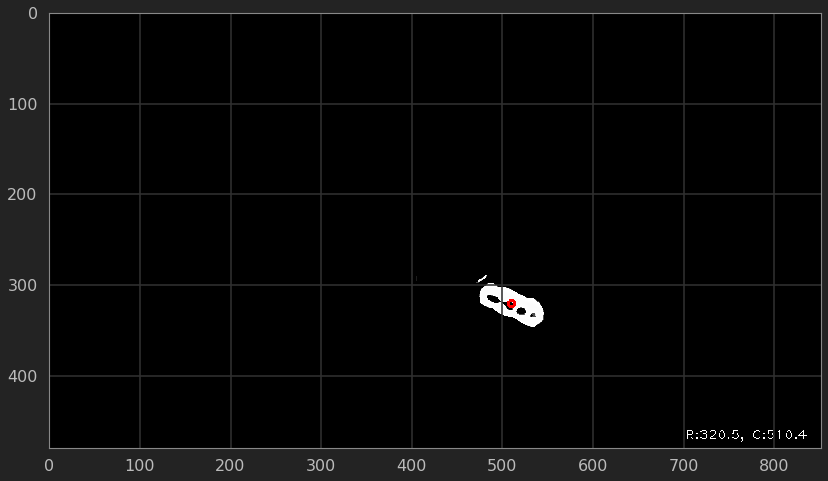

In [57]:
plt.figure(figsize=(18,8))
plt.imshow(imread("out/out-06299.png"))

In [70]:
bug_position = []
for line in positions.getvalue().split('\n'):
    parts = line.split(',')
    if len(parts)  == 3:
        y = float(parts[1])
        x = float(parts[2])
        bug_position.append((x, y))
    

In [94]:
def show_path_at(starting_frame, length=60):
    bug_position_x = [x[0] for x in bug_position[starting_frame:starting_frame+length]]
    bug_position_y = [480 - x[1] for x in bug_position[starting_frame:starting_frame+length]]
    plt.figure(figsize=(18,18))
    plt.ylim(0,480)
    plt.xlim(0,852)
    plt.imshow(imread("background.png"))
    plt.plot(bug_position_x, bug_position_y)

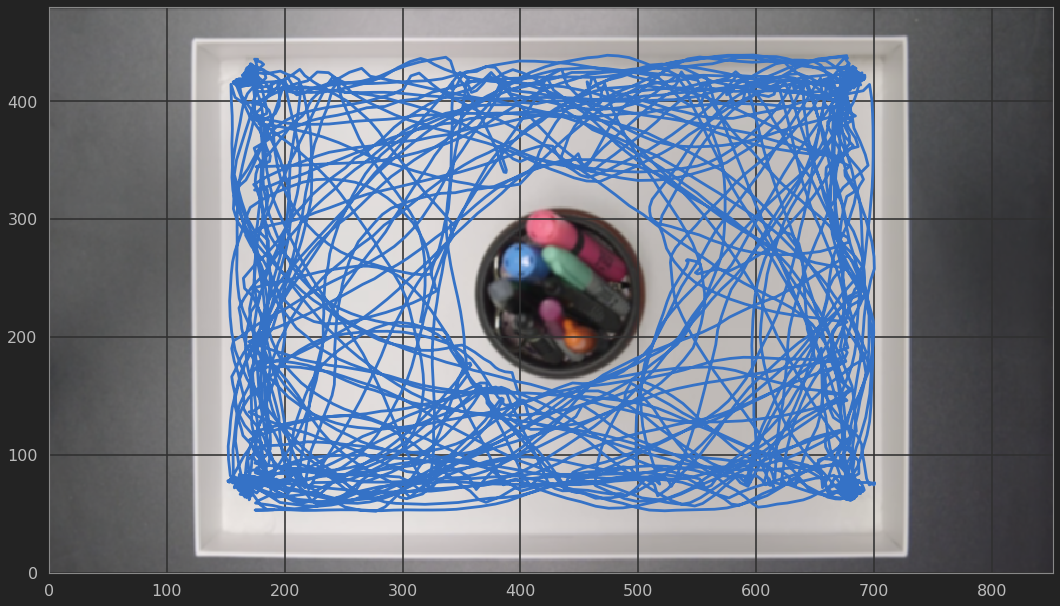

In [96]:
show_path_at(0,6300)

In [124]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
kf = KalmanFilter(dim_x=4, dim_z=2)
kf.x = np.array([[0.],
                 [0.],
                 [0.],
                 [0.]])       # initial state (location and velocity)

kf.F = np.array([[1., 0., 1., 0.],
                 [0., 1., 0., 1.],
                 [0., 0., 1., 0.],
                 [0., 0., 0., 1.]])    # state transition matrix

kf.H = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0]])    # Measurement function
kf.P *= 1000.                 # covariance matrix
kf.R = 5                      # state uncertainty
kf.Q = Q_discrete_white_noise(2) # process uncertainty

In [125]:
#lets get the velocity and predicted position at each location with the kalman filter
for i in range(len(bug_position[:12])):
    measurement = np.array(bug_position[i])
    kf.predict()
    predicted_pos = kf.x
    kf.update(measurement)

    # do something with the output
    kf_position = kf.x
    print(measurement, kf_position)

ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 